In [3]:
# (auto-reload changes from imported libraries)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.insert(0, "..")
from modules.mine_utils import read_log

# load arbitrary subsets of the main event log
sublog0 = read_log("data/sublog0.csv")
sublog1 = read_log("data/sublog1.csv")
sublog2 = read_log("data/sublog2.csv")

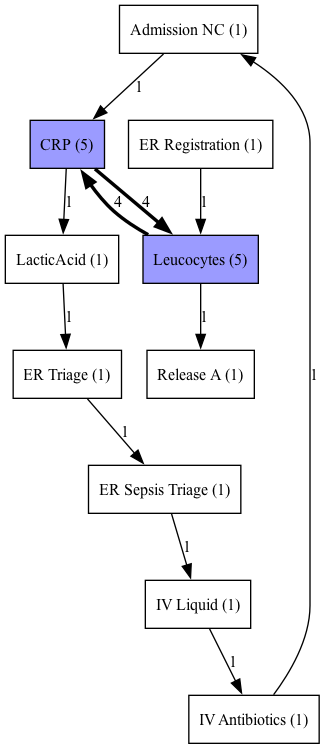

{('Admission NC', 'CRP'): 1, ('CRP', 'LacticAcid'): 1, ('CRP', 'Leucocytes'): 4, ('ER Registration', 'Leucocytes'): 1, ('ER Sepsis Triage', 'IV Liquid'): 1, ('ER Triage', 'ER Sepsis Triage'): 1, ('IV Antibiotics', 'Admission NC'): 1, ('IV Liquid', 'IV Antibiotics'): 1, ('LacticAcid', 'ER Triage'): 1, ('Leucocytes', 'CRP'): 4, ('Leucocytes', 'Release A'): 1}


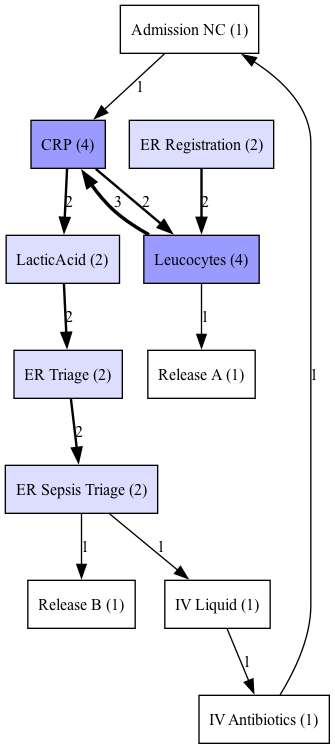

{('Admission NC', 'CRP'): 1, ('CRP', 'LacticAcid'): 2, ('CRP', 'Leucocytes'): 2, ('ER Registration', 'Leucocytes'): 2, ('ER Sepsis Triage', 'IV Liquid'): 1, ('ER Sepsis Triage', 'Release B'): 1, ('ER Triage', 'ER Sepsis Triage'): 2, ('IV Antibiotics', 'Admission NC'): 1, ('IV Liquid', 'IV Antibiotics'): 1, ('LacticAcid', 'ER Triage'): 2, ('Leucocytes', 'CRP'): 3, ('Leucocytes', 'Release A'): 1}


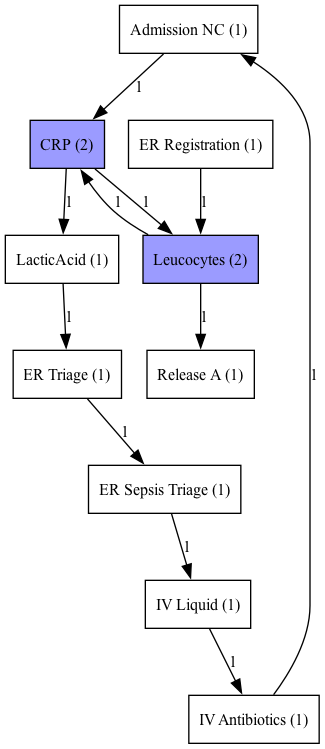

{('Admission NC', 'CRP'): 1, ('CRP', 'LacticAcid'): 1, ('CRP', 'Leucocytes'): 1, ('ER Registration', 'Leucocytes'): 1, ('ER Sepsis Triage', 'IV Liquid'): 1, ('ER Triage', 'ER Sepsis Triage'): 1, ('IV Antibiotics', 'Admission NC'): 1, ('IV Liquid', 'IV Antibiotics'): 1, ('LacticAcid', 'ER Triage'): 1, ('Leucocytes', 'CRP'): 1, ('Leucocytes', 'Release A'): 1}


In [5]:
from modules.mine_utils import mine_dfg

# mine & visualize the DFG (directly-follows-graphs) for each sublog
dfg0 = mine_dfg(sublog0)
print(dfg0)
dfg1 = mine_dfg(sublog1)
print(dfg1)
dfg2 = mine_dfg(sublog2)
print(dfg2)

In [6]:
# each DFG is also returned as a nested dictionary!
# (key = sequential relation between events; value = relation frequency (but can also be something else))
# so, we can process these and check the differences between them below ...
print(dfg0)

{('Admission NC', 'CRP'): 1, ('CRP', 'LacticAcid'): 1, ('CRP', 'Leucocytes'): 4, ('ER Registration', 'Leucocytes'): 1, ('ER Sepsis Triage', 'IV Liquid'): 1, ('ER Triage', 'ER Sepsis Triage'): 1, ('IV Antibiotics', 'Admission NC'): 1, ('IV Liquid', 'IV Antibiotics'): 1, ('LacticAcid', 'ER Triage'): 1, ('Leucocytes', 'CRP'): 4, ('Leucocytes', 'Release A'): 1}


In [7]:
logs = [ sublog0, sublog1, sublog2 ]

In [8]:
from modules.cmp_logs import logs_to_dfgs, compare_dfgs, GroupTypes, print_cmp_results

# construct DFG for each sublog & get comparison results
cmp_results = compare_dfgs(logs_to_dfgs(logs))


# print the comparison results in a "human-readable" format

# compare each log to one another, exhaustively listing the differences
# (it is coincidence that sublog0 and sublog2 have the same DFG!)
print("-- compare by log\n")
print_cmp_results(cmp_results,  [ 'sub0', 'sub1', 'sub2' ], group_type=GroupTypes.BY_LOG)

# # per event and sequential relation between them ("edge"), list logs where they are found and where they are missing
print("\n\n-- compare by element")
print_cmp_results(cmp_results,  [ 'sub0', 'sub1', 'sub2' ], group_type=GroupTypes.BY_ELEMENT)

# visualize the differences
# TODO :-)

-- compare by log

> log sub0
- compared to log sub1:
. missing events: Release B
. missing edges:
 ER Sepsis Triage -> Release B

- compared to log sub2:
no differences


> log sub1
- compared to log sub0:
. extra events: Release B
. extra edges:
 ER Sepsis Triage -> Release B

- compared to log sub2:
. extra events: Release B
. extra edges:
 ER Sepsis Triage -> Release B


> log sub2
- compared to log sub0:
no differences

- compared to log sub1:
. missing events: Release B
. missing edges:
 ER Sepsis Triage -> Release B




-- compare by element
. event 'Release B' from sub1 not found in sub0, sub2
. edge 'ER Sepsis Triage -> Release B' from sub1 not found in sub0, sub2



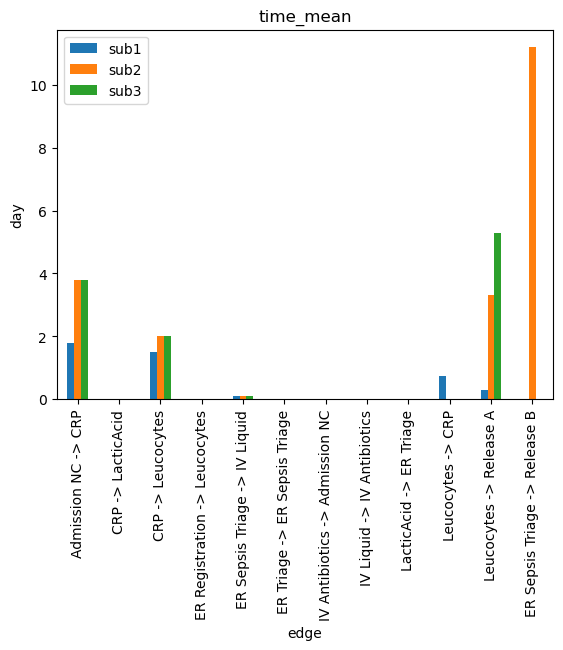

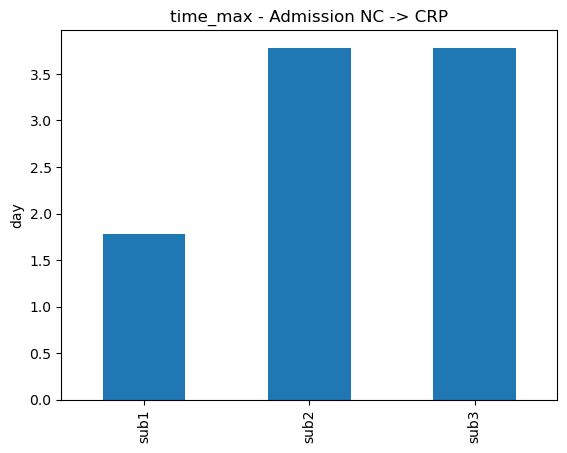

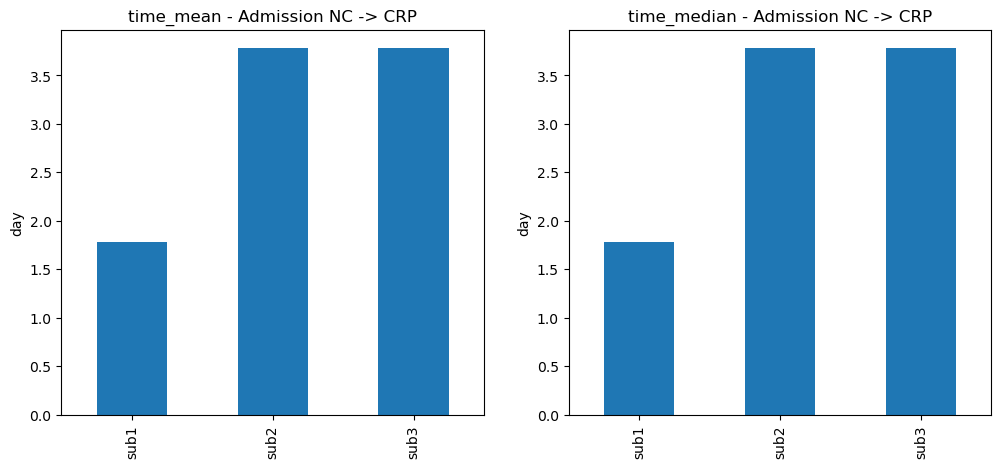

In [9]:
from modules.cmp_logs import plot_metric_dfg, plot_metrics_dfg

# for all sequential relations, compare their mean times between the sublogs
# bar = sublog, x-axis tick = sequential relation, y-axis = some dimension (in this case, mean duration)
# (not too interesting here, since the sublogs were randomly chosen)
plot_metric_dfg(logs, log_labels=[ 'sub1', 'sub2', 'sub3' ], metric='time_mean', normalize=True)

# zoom in on a particular sequential relation (in this case, 'Admission NC' -> 'CRP')
# for Application_log: edges=[[ ' edit ', ' view ' ], [ ' view ', ' rename ' ]]
plot_metric_dfg(logs, log_labels=[ 'sub1', 'sub2', 'sub3' ], metric='time_max', normalize=True, per_edge=True, edges=[[ 'Admission NC', 'CRP' ]])

# plot multiple "zoomed-in" comparisons side-by-side
# in this case, mean duration on the left, and median duration on the right
plot_metrics_dfg(logs, log_labels=[ 'sub1', 'sub2', 'sub3' ], metric1='time_mean', metric2='time_median', normalize=True, per_edge=True, edges=[[ 'Admission NC', 'CRP' ]])